# Coding PCA from scratch


### following the toturial from this link
https://pietromarchesi.net/pca-newbie-to-ninja.html#pca-newbie-to-ninja

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%config InlineBackend.figure_format = 'svg'
import seaborn as sns
import pandas as pd

# df = sns.load_dataset("iris")

# df.head()

In [56]:
mouse = 'reach1_4'


In [57]:
if mouse == 'necab1':
    num_reaches = 182

if mouse == 'reach1_4':
    num_reaches = 278

probe = 'B' # probe used for the neural data
bin_size_in_ms = 10 # in milliseconds
output_dimension = 8 # number of dimensions for the embeddingspre
pre_reach = 1
post_reach = 5

pre_reach_str = str(pre_reach)
if pre_reach < 1:
    window_size = f'{pre_reach_str[0]}{pre_reach_str[-1]}_{post_reach}_timeWindow'
if pre_reach >= 1:
    window_size = f'{pre_reach_str}_{post_reach}_timeWindow'

# the path to the .npy file for the neural data (structred as firing rates x time x neurons)
probeB_hist_path = f'hist/{mouse}_{pre_reach}_{post_reach}_window_{bin_size_in_ms}ms_FR_hist_B.npy'
# hist_loaded_b = np.load(f'{probeB_hist_path}', allow_pickle=True)
# hist_loaded_b = np.load('/Users/grant/Documents/GitHub/PCA_on_neural_data/hist/reach1_4_1_5_window_10ms_FR_hist_B.npy', allow_pickle=True)


In [68]:
hist_loaded_b = np.load('/Users/grant/Documents/GitHub/PCA_on_neural_data/hist/reach1_4_1_5_window_10ms_FR_hist_B.npy', allow_pickle=True)
hist_loaded_b = np.load('/Users/grant/Documents/GitHub/PCA_on_neural_data/hist/necab1_1_5_window_10ms_FR_hist_B.npy', allow_pickle=True)
neural_data = hist_loaded_b

# neural_data = np.load(neural_data_path)
hist_loaded_b.shape

(403, 600)

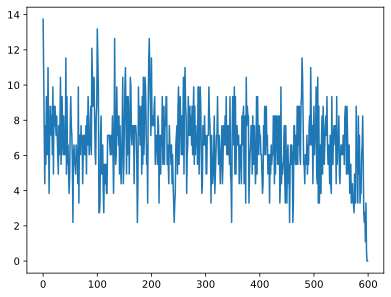

In [74]:
hist_loaded_b[5]
plt.plot(hist_loaded_b[3])

In [59]:
df = pd.DataFrame(neural_data)
df

,0,1,2,3,4,5,6,7,8,9,...,590,591,592,593,594,595,596,597,598,599
0,3.846154,1.648352,0.549451,0.549451,1.648352,3.296703,1.098901,0.549451,1.648352,0.549451,...,0.000000,0.549451,0.000000,0.549451,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,6.043956,2.747253,2.747253,6.593407,4.395604,5.494505,6.043956,3.846154,1.098901,2.197802,...,1.648352,0.000000,1.098901,0.549451,0.549451,0.000000,0.000000,0.549451,0.000000,0.0
2,1.098901,0.000000,1.098901,0.549451,1.098901,0.000000,0.000000,1.648352,1.098901,1.098901,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,13.736264,10.439560,7.692308,4.395604,7.692308,5.494505,9.340659,6.593407,6.043956,10.989011,...,8.241758,5.494505,2.747253,2.197802,2.747253,1.098901,3.296703,0.549451,0.000000,0.0
4,0.000000,0.549451,0.549451,0.549451,0.549451,0.549451,0.000000,1.098901,0.549451,0.000000,...,0.000000,0.000000,0.000000,0.549451,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
399,4.395604,2.197802,3.296703,1.648352,0.000000,1.098901,2.747253,2.197802,1.098901,2.747253,...,1.098901,0.000000,1.098901,1.098901,1.648352,0.000000,0.549451,0.000000,0.000000,0.0
400,9.340659,5.494505,7.142857,4.395604,3.296703,4.945055,4.945055,4.395604,4.945055,7.142857,...,4.395604,0.549451,1.098901,1.648352,4.395604,0.000000,1.098901,0.000000,0.549451,0.0
401,1.098901,2.747253,1.098901,1.648352,0.549451,1.098901,0.000000,1.648352,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [60]:
# <!-- collapse=False -->
f = sns.pairplot(df_1, hue="unitID")


NameError: name 'df_1' is not defined

In [61]:
# Suppose `data` is your numpy array with shape (538, 600)
# Create a DataFrame
df = pd.DataFrame(neural_data)
df['species'] = 'unit'


# df

In [62]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(hist_loaded_b)
print
# Initialize PCA, you can adjust the n_components to the number 
#
#of principal components you want
pca = PCA(n_components=3)  # For example, reducing to 2 dimensions
principalComponents = pca.fit_transform(df_scaled)

# Create a DataFrame with the principal components
principal_df = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3'])
principal_df['principal component 1'][200:300]

200   -16.844154
201    21.088045
202    12.960984
203   -10.327809
204    41.625298
         ...    
295    -1.043203
296   -16.114618
297    -8.209765
298   -14.490479
299   -16.374069
Name: principal component 1, Length: 100, dtype: float64

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
plt.scatterplot(data=principal_df, x='principal component 1', y='principal component 2')
plt.title('PCA of Neural Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


AttributeError: module 'matplotlib.pyplot' has no attribute 'scatterplot'

<Figure size 1000x600 with 0 Axes>

/var/folders/mc/qbcjsrl16h3gf6t6xvz8czzw0000gn/T/ipykernel_18281/2088300270.py:17: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(principal_df['principal component 1'], principal_df['principal component 2'], c=colors, cmap=cmap)


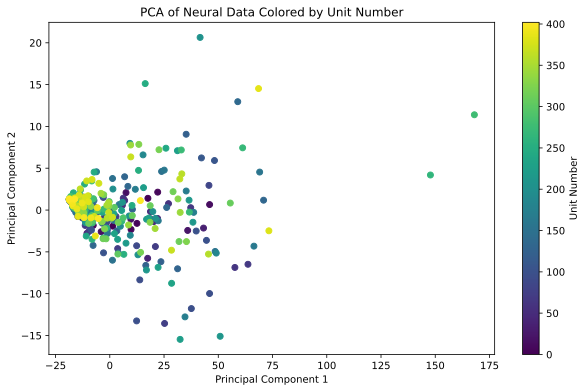

In [64]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.cm import ScalarMappable

# Assuming 'principal_df' is your DataFrame containing the principal components
# Create a color map from yellow to dark blue
cmap = plt.get_cmap('viridis')

# Generate colors from the colormap based on the index of each unit
norm = mcolors.Normalize(vmin=0, vmax=len(principal_df)-1)  # adjusted to account for zero indexing
colors = [cmap(norm(i)) for i in range(len(principal_df))]
# colors = [cmap(norm(i)) for i in range(100)]


# Create the plot with explicit axes
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(principal_df['principal component 1'], principal_df['principal component 2'], c=colors, cmap=cmap)

plt.title('PCA of Neural Data Colored by Unit Number')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Create colorbar with the created scatter
cbar = plt.colorbar(ScalarMappable(norm=norm, cmap=cmap), ax=ax)
cbar.set_label('Unit Number')

# plt.show()




In [65]:
y = np.zeros(403)
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

(403, 600)
(403, 3)


TypeError: Cannot cast array data from dtype('float64') to dtype('int64') according to the rule 'safe'

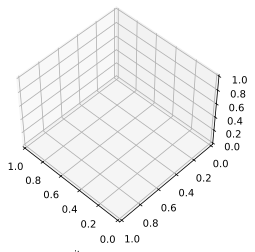

In [66]:
# Code source: Gaël Varoquaux
# License: BSD 3 clause

import matplotlib.pyplot as plt

# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401
import numpy as np

from sklearn import datasets, decomposition

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
X = hist_loaded_b
print(X.shape)

y = iris.target
y = np.zeros(403)
fig = plt.figure(1, figsize=(4, 3))
plt.clf()

ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
ax.set_position([0, 0, 0.95, 1])


plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)
print(X.shape)

for name, label in [("unit", 0)]:
    ax.text3D(
        X[y == label, 0].mean(),
        X[y == label, 1].mean() + 1.5,
        X[y == label, 2].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
    )
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral, edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

plt.show()

[0.         0.54945055 0.54945055 0.54945055 0.54945055 0.54945055
 0.         1.0989011  0.54945055 0.         0.54945055 0.54945055
 1.0989011  0.         0.         1.64835165 0.54945055 0.54945055
 0.54945055 1.0989011  0.54945055 1.0989011  1.0989011  0.54945055
 1.64835165 0.54945055 1.0989011  0.         0.54945055 0.54945055
 1.64835165 0.54945055 0.54945055 0.54945055 1.0989011  0.54945055
 0.54945055 0.54945055 0.54945055 0.54945055 2.1978022  0.
 0.54945055 1.0989011  1.0989011  0.54945055 1.0989011  1.0989011
 0.54945055 0.         0.         1.0989011  1.0989011  1.0989011
 1.0989011  0.54945055 0.54945055 1.0989011  1.64835165 0.54945055
 0.         1.0989011  1.0989011  1.0989011  1.64835165 0.
 0.54945055 1.64835165 1.0989011  0.         1.0989011  1.64835165
 1.0989011  1.0989011  1.0989011  0.54945055 1.64835165 1.0989011
 0.54945055 0.54945055 1.64835165 1.64835165 0.54945055 0.
 1.0989011  0.54945055 0.         1.64835165 1.0989011  0.
 0.         0.54945055 0.54945

/var/folders/mc/qbcjsrl16h3gf6t6xvz8czzw0000gn/T/ipykernel_18281/2867907230.py:32: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(principal_df['PC1'], principal_df['PC2'], principal_df['PC3'], c=colors, cmap=cmap)


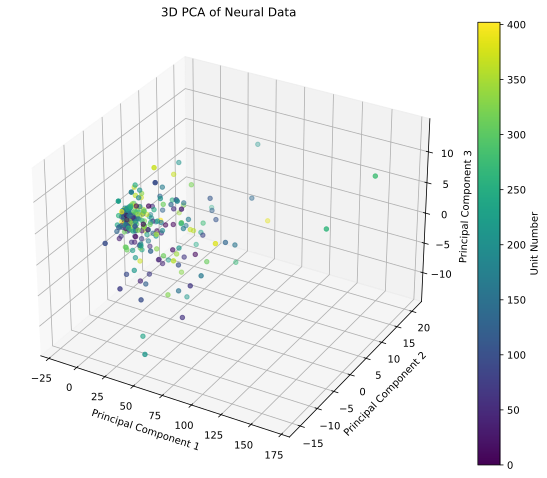

In [67]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors

# Assuming 'data' is your numpy array with shape (538, 600)
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(hist_loaded_b)
print(hist_loaded_b[4])
print(data_scaled)

# Initialize PCA for 3 components
pca = PCA(n_components=3)
principal_components = pca.fit_transform(data_scaled)

# Create a DataFrame with the principal components
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])

# Create a colormap
cmap = plt.get_cmap('viridis')
norm = mcolors.Normalize(vmin=0, vmax=len(principal_df)-1)
colors = [cmap(norm(i)) for i in range(len(principal_df))]

# Plotting
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')  # 3D plot

scatter = ax.scatter(principal_df['PC1'], principal_df['PC2'], principal_df['PC3'], c=colors, cmap=cmap)
ax.set_title('3D PCA of Neural Data')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Colorbar
# cbar = plt.colorbar(mcolors.ScalarMappable(norm=norm, cmap=cmap), ax=ax)
cbar = plt.colorbar(ScalarMappable(norm=norm, cmap=cmap), ax=ax)

cbar.set_label('Unit Number')

plt.show()


In [13]:
# <!-- collapse=False -->

f = sns.pairplot(df, hue="species")

AttributeError: module 'numpy' has no attribute 'float'.
`np.float` was a deprecated alias for the builtin `float`. To avoid this error in existing code, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [14]:
X = df.iloc[:,0:599].values
y = df.iloc[:,600].values


IndexError: single positional indexer is out-of-bounds

In [32]:
X.shape, X

((403, 599),
 array([[3.84615385, 1.64835165, 0.54945055, ..., 0.        , 0.        ,
         0.        ],
        [6.04395604, 2.74725275, 2.74725275, ..., 0.        , 0.54945055,
         0.        ],
        [1.0989011 , 0.        , 1.0989011 , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [9.34065934, 5.49450549, 7.14285714, ..., 1.0989011 , 0.        ,
         0.54945055],
        [1.0989011 , 2.74725275, 1.0989011 , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]]))

In [33]:
y.shape, y

((403,),
 array(['baseline', 'baseline', 'baseline', 'baseline', 'baseline',
        'baseline', 'baseline', 'baseline', 'baseline', 'baseline',
        'baseline', 'baseline', 'baseline', 'baseline', 'baseline',
        'baseline', 'baseline', 'baseline', 'baseline', 'baseline',
        'baseline', 'baseline', 'baseline', 'baseline', 'baseline',
        'baseline', 'baseline', 'baseline', 'baseline', 'baseline',
        'baseline', 'baseline', 'baseline', 'baseline', 'baseline',
        'baseline', 'baseline', 'baseline', 'baseline', 'baseline',
        'baseline', 'baseline', 'baseline', 'baseline', 'baseline',
        'baseline', 'baseline', 'baseline', 'baseline', 'baseline',
        'baseline', 'baseline', 'baseline', 'baseline', 'baseline',
        'baseline', 'baseline', 'baseline', 'baseline', 'baseline',
        'baseline', 'baseline', 'baseline', 'baseline', 'baseline',
        'baseline', 'baseline', 'baseline', 'baseline', 'baseline',
        'baseline', 'baseline', 'baseli

In [15]:
X_mean = np.mean(X, axis=0)
X_std = (X - X_mean)
print(X_std.mean(axis=0))

[ 6.71974194e-15  1.97470934e-15  4.72850322e-15  4.58965647e-15
  4.17642210e-15  4.47064497e-15  6.24149202e-15  4.41775097e-15
  1.73448242e-15  6.88944352e-15  3.60230180e-15  4.18303385e-15
  1.00388405e-15  2.93892289e-15  3.49430989e-15  7.96936269e-15
  1.33116567e-15  1.99674851e-15  5.04696918e-15  3.71690547e-15
  3.11303230e-15  5.57260331e-15  6.44755823e-15  2.48050822e-15
  3.23424772e-15  4.95220077e-15  6.65472640e-15  5.66516781e-15
  4.38579418e-15  5.25303539e-15  2.61164126e-15  3.20449484e-15
  2.03421509e-15  4.75495022e-15  3.50202360e-15  4.70426014e-15
  2.30529684e-15  5.36763906e-15  7.62444973e-15  5.04917310e-15
  1.27716971e-15  7.13407827e-15  3.78412493e-15  1.15485234e-15
  5.35221164e-15  4.82106772e-15  5.55607394e-15  7.68395548e-15
  6.46849544e-15  5.25193343e-15  6.39907206e-15  6.96327473e-15
  5.92192410e-15  3.36758468e-15  7.72693186e-15  7.83271986e-15
  5.23430210e-15  7.27072111e-15  6.91589052e-15  4.56651535e-15
  6.51036986e-15  7.38312

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your numpy array with shape (538, 600)
# Each row represents a unit, and each column represents a time bin

# Standardize the data
X_mean = np.mean(neural_data, axis=0)
X_std = neural_data - X_mean

# Verifying the mean of the standardized data (should be close to 0)
# print(X_std.mean(axis=0))

# Compute the covariance matrix
cov_mat = np.cov(X_std, rowvar=False)  # rowvar=False since each column represents a variable

# Plotting the covariance matrix
# For labels, you might want to create a list of time bins if you need specific labels
time_bins = [f'Time {i+1}' for i in range(neural_data.shape[1])]

# Plotting the covariance matrix with minimal x-tick labels
plt.figure(figsize=(12, 10))
ax = sns.heatmap(cov_mat, cmap="YlGnBu")
ax.set_title('Covariance Matrix of Neural Data')
ax.set_xlabel('Time Bins')
ax.set_ylabel('Time Bins')

# Set ticks at the beginning and end only
ax.set_xticks([0, cov_mat.shape[1]-1])
ax.set_yticks([0, cov_mat.shape[0]-1])
ax.set_xticklabels([1, 600])  # Adjust these numbers as per your data indexing
ax.set_yticklabels([1, 600])

# plt.show()


/Users/grant/opt/anaconda3/envs/pca/lib/python3.9/site-packages/seaborn/matrix.py:71: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.
  mask = np.zeros(data.shape, np.bool)


AttributeError: module 'numpy' has no attribute 'bool'.
`np.bool` was a deprecated alias for the builtin `bool`. To avoid this error in existing code, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

<Figure size 1200x1000 with 0 Axes>

In [16]:
# compute eigendecomposition
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors: \n{}'.format(eig_vecs[0:5]))
print('Eigenvalues: \n{}'.format(eig_vals[0:5]))

NameError: name 'cov_mat' is not defined

In [37]:
srt = np.argsort(eig_vals)[::-1] # indices of eigenvalues from largest to smallest
eig_vals_srtd = eig_vals[srt] # sorted eigenvalues
eig_vecs_srtd = eig_vecs[:, srt] # sorted eigenvectors
print('Sorted eigenvalues: \n{}'.format(eig_vals_srtd[0:5]))
print('\nSorted eigenvectors: \n{}'.format(eig_vecs_srtd[0:5]))

Sorted eigenvalues: 
[10769.49179794+0.j   252.98035389+0.j   167.44698502+0.j
    72.62079925+0.j    53.69861258+0.j]

Sorted eigenvectors: 
[[-0.07242721+0.j  0.07156367+0.j -0.05696135+0.j ... -0.00227176+0.j
  -0.08534528+0.j  0.02298512+0.j]
 [-0.03740303+0.j  0.04504658+0.j -0.02469055+0.j ... -0.02425515+0.j
   0.02383015+0.j -0.04954851+0.j]
 [-0.036816  +0.j  0.04774693+0.j -0.03683061+0.j ... -0.03020744+0.j
   0.10762718+0.j -0.04647763+0.j]
 [-0.03784123+0.j  0.04637818+0.j -0.02179915+0.j ... -0.0006962 +0.j
  -0.00600077+0.j  0.01291176+0.j]
 [-0.03826308+0.j  0.04731799+0.j -0.0230357 +0.j ... -0.00277079+0.j
   0.01363042+0.j -0.00839598+0.j]]


In [38]:
C = eig_vecs_srtd[:, 0:2]
print(C)

[[-0.07242721+0.j  0.07156367+0.j]
 [-0.03740303+0.j  0.04504658+0.j]
 [-0.036816  +0.j  0.04774693+0.j]
 ...
 [-0.00852285+0.j  0.01043959+0.j]
 [-0.00152282+0.j  0.00065695+0.j]
 [ 0.        +0.j  0.        +0.j]]


/Users/grant/opt/anaconda3/envs/pca/lib/python3.9/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/grant/opt/anaconda3/envs/pca/lib/python3.9/site-packages/matplotlib/collections.py:194: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


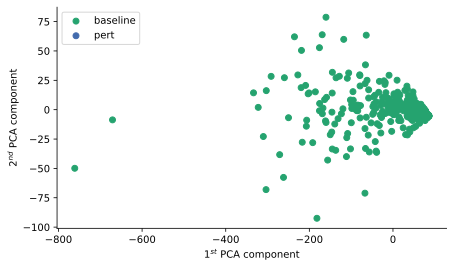

In [39]:

Xp = np.matmul(X_std, C)
species = ['baseline','pert']
colors  = ['teal green','french blue']
f, ax = plt.subplots(1, 1, figsize=[7, 4])
for sp, c in zip(species, colors):
    ax.scatter(Xp[y==sp,0], -Xp[y==sp,1], c=sns.xkcd_rgb[c], label=sp)
l = ax.legend()
sns.despine(fig=f, top=True, right=True)
ax.set_xlabel('$1^{st}$ PCA component');
ax.set_ylabel('$2^{nd}$ PCA component');

In [40]:
print(C[:, 0])


[-0.07242721+0.j -0.03740303+0.j -0.036816  +0.j -0.03784123+0.j
 -0.03826308+0.j -0.03675494+0.j -0.03690842+0.j -0.03662808+0.j
 -0.03730008+0.j -0.03677001+0.j -0.03681523+0.j -0.03523543+0.j
 -0.03826576+0.j -0.0369235 +0.j -0.03689214+0.j -0.03680777+0.j
 -0.03582707+0.j -0.03428439+0.j -0.03682322+0.j -0.03592958+0.j
 -0.03471336+0.j -0.03596863+0.j -0.03680675+0.j -0.037475  +0.j
 -0.03763792+0.j -0.03817892+0.j -0.03774529+0.j -0.03641611+0.j
 -0.03661683+0.j -0.03552053+0.j -0.03529902+0.j -0.03671034+0.j
 -0.03726984+0.j -0.03387785+0.j -0.03583876+0.j -0.03748939+0.j
 -0.03652572+0.j -0.0373887 +0.j -0.0368949 +0.j -0.03625584+0.j
 -0.03798207+0.j -0.04056587+0.j -0.04149592+0.j -0.03932919+0.j
 -0.04001246+0.j -0.04020161+0.j -0.04190717+0.j -0.0424807 +0.j
 -0.03882786+0.j -0.04047814+0.j -0.03893477+0.j -0.04084394+0.j
 -0.03852893+0.j -0.03714765+0.j -0.04002988+0.j -0.03698043+0.j
 -0.03689983+0.j -0.04009659+0.j -0.03760287+0.j -0.03834079+0.j
 -0.03800624+0.j -0.03819

In [41]:
def apply_PCA(X, n_components=2):
    X_std = X -  np.mean(X, axis=0) # 1. Center the data
    cov_mat = np.cov(X_std, rowvar=False) # 2. Compute the covariance matrix
    eig_vals, eig_vecs = np.linalg.eig(cov_mat) # 3. Eigenvectors and values of the cov. matrix
    srt = np.argsort(eig_vals)[::-1] # 4. Sort and choose the eigenvectors
    eig_vecs_srtd = eig_vecs[:, srt] 
    C = eig_vecs_srtd[:, 0:n_components] 
    Xp = np.matmul(X_std, C) # 5. Project the data
    return Xp

/Users/grant/opt/anaconda3/envs/pca/lib/python3.9/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


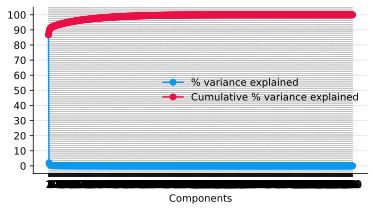

In [42]:
total_var = eig_vals_srtd.sum()
var_exp = [(v / total_var)*100 for v in eig_vals_srtd]
cumulative_var = [np.sum(var_exp[0:i]) for i in range(1, len(var_exp)+1)]

f, ax = plt.subplots(1, 1, figsize=[6,3])
ax.plot(range(len(var_exp)), var_exp,'-o', label='% variance explained', color=sns.xkcd_rgb["azure"])
ax.plot(range(len(var_exp)), cumulative_var,'-o', label='Cumulative % variance explained', c=sns.xkcd_rgb["pinkish red"])
ticks = ax.set_xticks(range(len(var_exp)))
tick_lab = ax.set_xticklabels(range(1, len(var_exp)+1))
yticks = ax.set_yticks(np.arange(0, 110, 10))
sns.despine(fig=f, right=True, top=True)
xlab = ax.set_xlabel('Components')
ax.grid(ls=':')
l = ax.legend(frameon=False)

# Doing it the fast way

In [43]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4) # Instantiate the PCA class, specifying the number of components we want
Xp = pca.fit_transform(X) # Done! Xp is the lower dimensional representation of our data

In [44]:
pca.components_


array([[ 0.07242721,  0.03740303,  0.036816  , ...,  0.01647057,
         0.00852285,  0.00152282],
       [ 0.07156367,  0.04504658,  0.04774693, ...,  0.02914264,
         0.01043959,  0.00065695],
       [-0.05696135, -0.02469055, -0.03683061, ..., -0.00169471,
         0.00347906,  0.00316501],
       [-0.00193555,  0.00282062,  0.01611331, ...,  0.03045388,
         0.01819628, -0.00261983]])

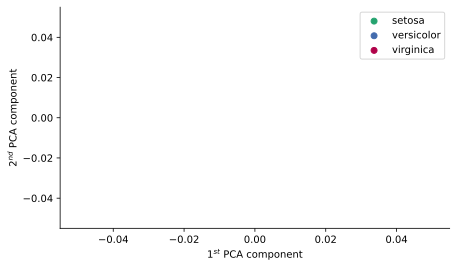

In [45]:
species = ['setosa', 'versicolor', 'virginica']
colors  = ['teal green', 'french blue', 'raspberry']
f, ax = plt.subplots(1, 1, figsize=[7, 4])
for sp, c in zip(species, colors):
    ax.scatter(Xp[y==sp,0], -Xp[y==sp,1], c=sns.xkcd_rgb[c], label=sp)
l = ax.legend()
sns.despine(fig=f, top=True, right=True)
ax.set_xlabel('$1^{st}$ PCA component');
ax.set_ylabel('$2^{nd}$ PCA component');

In [17]:
pca = PCA(n_components=0.9) 
Xp = pca.fit_transform(X)
print('Number of components which explain 90% of the variance: {}'.format(Xp.shape[1]))

pca = PCA(n_components=0.95) 
Xp = pca.fit_transform(X)
print('Number of components which explain 95% of the variance: {}'.format(Xp.shape[1]))

Number of components which explain 90% of the variance: 1
Number of components which explain 95% of the variance: 2


In [18]:
pca = PCA(n_components='mle') 
Xp = pca.fit_transform(X)
print('Number of components chosen with Minka\'s MLE estimation: {}'.format(Xp.shape[1]))

Number of components chosen with Minka's MLE estimation: 3
